# Problem-1

first we read the image, then we convert the color to rgb for the ease of use, after that we get the height and the width of the image and divide them by 2 to get the center pixel.
We then draw a 40 x 30 rectangle in the center of the image by going from the center to the corner, and thats by going back half of the rectangle width then up by half of the height to get the first corner, then we do it in the opposite direction.

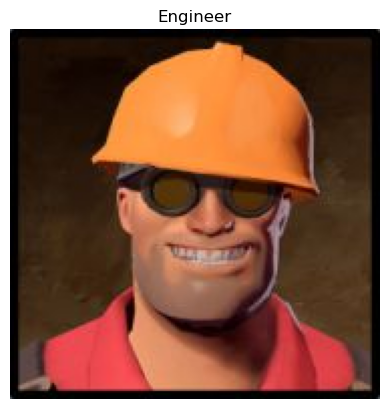

image center: [y= 92 x= 92]
center pixel intensity: [172  92  67]


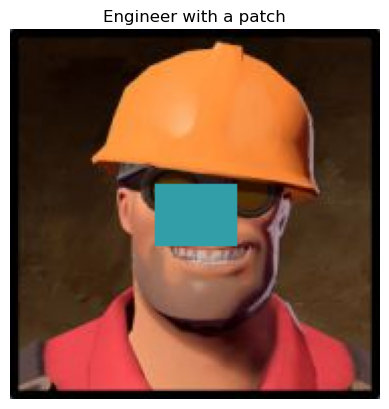

center pixel intensity: [ 50 158 168]


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

# read the image
image = cv.imread('tf2_engineer.jpg')

# convert the image to rgb (opencv displays it in bgr)
RGBimage = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# show the image
plt.imshow(RGBimage)
plt.title('Engineer')
plt.axis('off')
plt.show()

# get the image resolution
height = image.shape[0]
width = image.shape[1]

# get the image center pixel
Ycenter = height // 2
Xcenter = width // 2
centerPixel = RGBimage[Ycenter, Xcenter]

# print the image center and intensity
print(f"image center: [y= {Ycenter} x= {Xcenter}]")
print(f"center pixel intensity: {centerPixel}")

# assign the  40 * 30 rectangle corners by moving half the distance of each dimension from the center
topCorner = (Xcenter - 20, Ycenter + 15)
bottomCorner = (Xcenter + 20, Ycenter - 15)

# draw the rectangle patch
cv.rectangle(RGBimage, topCorner, bottomCorner, (50, 158, 168), -1)

# show the final result and print the center pixel intensity of th patch
plt.imshow(RGBimage)
plt.title('Engineer with a patch')
plt.axis('off')
plt.show()
print(f"center pixel intensity: {centerPixel}")

# Problem-2

First we read the image in grayscale, then we show the negative transformation of the image, after that we subtract the pixels value from 255 to create a new negative image. Then we select 5 random pixels and compare their values with the negative pixel from the same position.

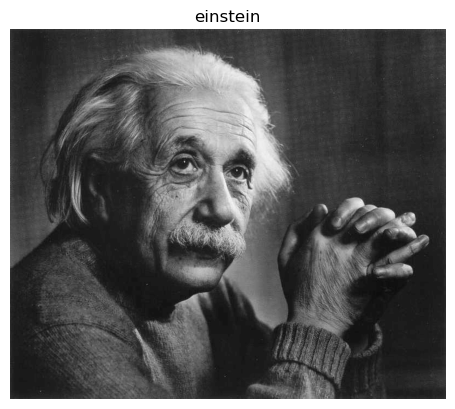

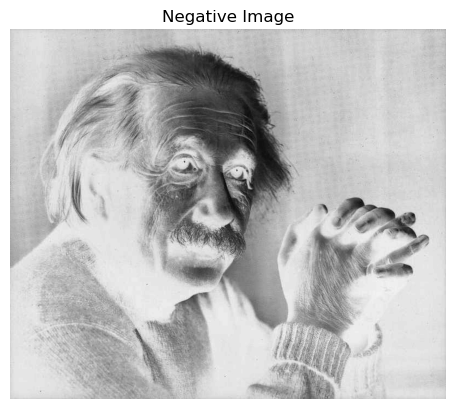

intensity of original pixel 1 at (524,177) = 110  negative pixel = 145
intensity of original pixel 2 at (582,377) = 99  negative pixel = 156
intensity of original pixel 3 at (785,534) = 98  negative pixel = 157
intensity of original pixel 4 at (61,63) = 99  negative pixel = 156
intensity of original pixel 5 at (170,635) = 117  negative pixel = 138


In [157]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

# read the image in grayscale
image = cv.imread('einstein.tif', cv.IMREAD_GRAYSCALE)

# display the image
plt.imshow(image, cmap='gray')
plt.title('einstein')
plt.axis('off')
plt.show()

# display negative image
plt.imshow(image, cmap='gray_r')
plt.title('Negative Image')
plt.axis('off')
plt.show()

# get the negative image
negativeImage = 255 - image

# get 5 random pixels from the original image and 5 from the negative one
height = image.shape[0]
width = image.shape[1]
for i in range(5):
    x = random.randint(0, width - 1)
    y = random.randint(0, height - 1)
    # print the posision and intensity of the pixels
    print(f"intensity of original pixel {i+1} at ({x},{y}) = {image[y, x]}  negative pixel = {negativeImage[y, x]}")
    

# Problem 3

We apply log transformation to brighten dark intenseties in the image, then we apply inverse to the original image to darken bright values, after that we try reversing the log transformation using exponentiation transformation to restore the original image.
When comparing, we see that the last step redid what we changed in log transformation turning the image to look like the original with slight changes in intensity due to cliping in the inversing transformation.

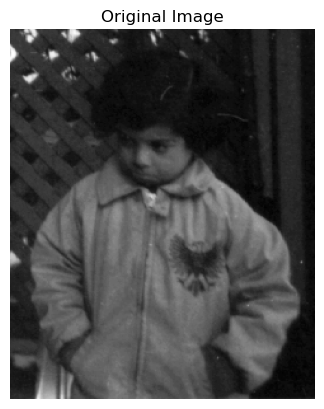

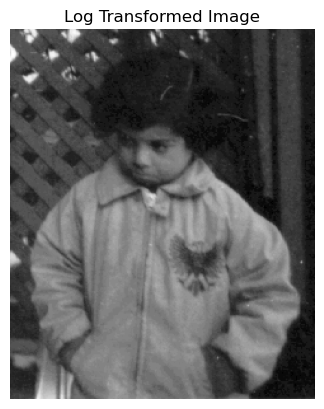

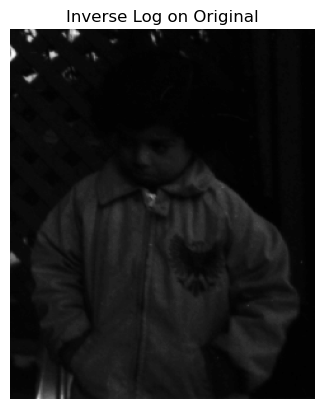

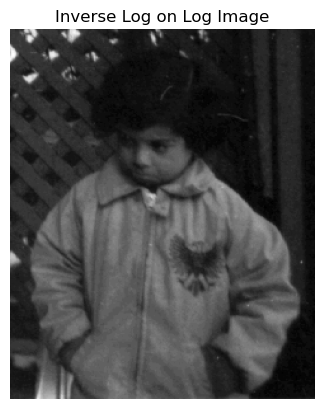

In [364]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read the image in grey scale
image = cv.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# apply log transformation
c = 255 / np.log(1 + np.max(image)) # get the scaling constant
logImage = c * np.log(1 + image.astype(np.float32)) # scale the pixels to the range from 0 to 255 in float
logImage = np.uint8(logImage) #return to uint8 so the image is readable
plt.imshow(logImage, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

# apply inverse log transformation
inverseLogImage = (np.exp(image / c) - 1) #expo is the exact opposite of log
inverseLogImage = np.uint8(np.clip(inverseLogImage, 0, 255)) # here we limit the range to 255 as expo can reach large numbers rapidly
plt.imshow(inverseLogImage, cmap='gray')
plt.title('Inverse Log on Original')
plt.axis('off')
plt.show()

# Inverse log the log transformed image to get back to normal
inverseLogBack = (np.exp(logImage / c) - 1)
inverseLogBack = np.uint8(np.clip(inverseLogBack, 0, 255))
plt.imshow(inverseLogBack, cmap='gray')
plt.title('Inverse Log on Log Image')
plt.axis('off')
plt.show()


# Problem 4

We apply unsharp mask in the spatial domain, first we use gaussian blur, then we subtract it from the original image to get the mask, then we add the mask to the orginal image. 
For the frequency domain we apply unsharping by using a high-pass filter. We first turn the image to the frequency domain then we shift high intensity pixels to the center, we then apply the high pass filter on it and convert it back.
We used k values to adjust the sharpness of the masks used on both unsharp masks.


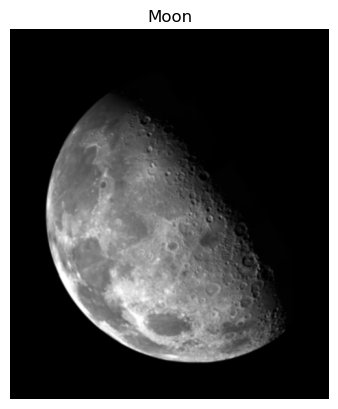

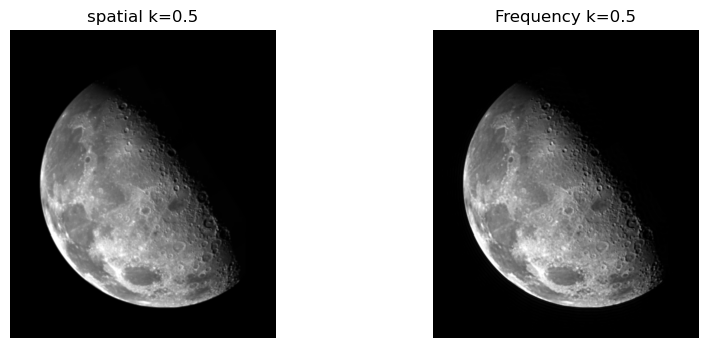

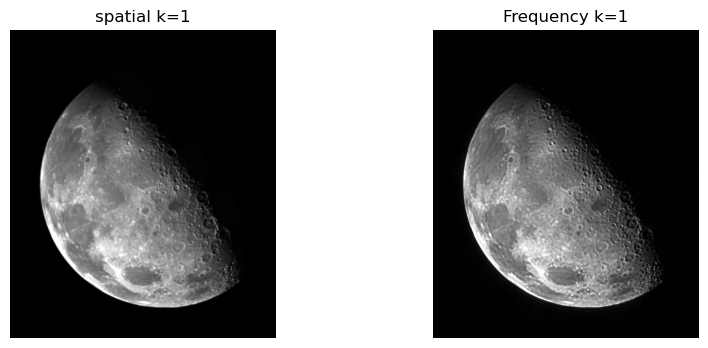

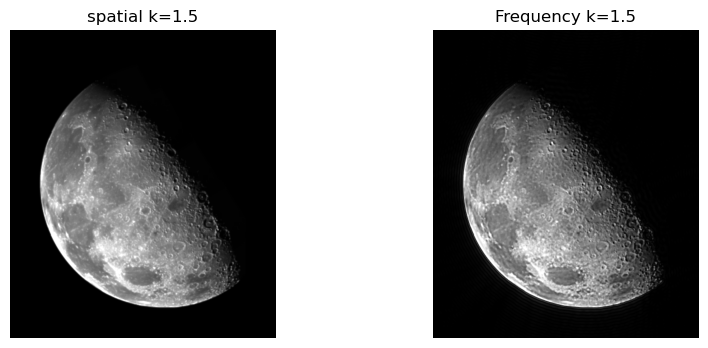

In [178]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read image for display
f = cv.imread('moon.tif', 0)
plt.imshow(f, cmap='gray')
plt.title('Moon')
plt.axis('off')
plt.show()

# the best values i found
D0 = 50
kArray = [0.5, 1, 1.5]

# unsharp masking in the spatial domain
def spatialUnsharp(f, k):
    fBlur = cv.GaussianBlur(f, (9, 9), 0)
    gMask = cv.subtract(f, fBlur) # gmask = image(f) - blur(f-)
    g = cv.addWeighted(f, 1.0, gMask, k, 0) # g = f + k x gmask
    return g

# low-pass filter
height = f.shape[0]
width = f.shape[1]
H = np.zeros((height, width), dtype=np.float32)
for u in range(height):
    for v in range(width):
        D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
        if D <= D0:
            H[u, v] = 1  # inside cutoff (passed)
        else:
            H[u, v] = 0  # outside cutoff (blocked) 

# inverse the low-pass filter to act as high-pass filter
H = 1 - H


def frequencyUnsharp(f, k):
    F = np.fft.fft2(f)  # image in frequency domain
    Fshift = np.fft.fftshift(F)  # shift low frequency to the center
    Gshift = (1 + k * H) * Fshift  # apply unsharp mask in frequency domain
    g = np.fft.ifft2(np.fft.ifftshift(Gshift))  # inverse fourier transform
    g = np.abs(g)  # convert from complex and imaginary to real numbers
    g = np.uint8(np.clip(g, 0, 255))  # normalize
    return g

spatialResults = [spatialUnsharp(f, k) for k in kArray]
frequencyResults = [frequencyUnsharp(f, k) for k in kArray]

# display the results
for i, k in enumerate(kArray):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(spatialResults[i], cmap='gray')
    axs[0].set_title(f'spatial k={k}')
    axs[0].axis('off')
    axs[1].imshow(frequencyResults[i], cmap='gray')
    axs[1].set_title(f'Frequency k={k}')
    axs[1].axis('off')
    plt.show()



# Problem 5

The image displayed has salt-pepper noise, the histogram shows extreme peaks at the ends and wide low values in the middle intensities.
I applied median blur as its the most suitable filter for salt-pepper noise images, and as you can see the histogram now has more values in the middle and a good distributed peaks.

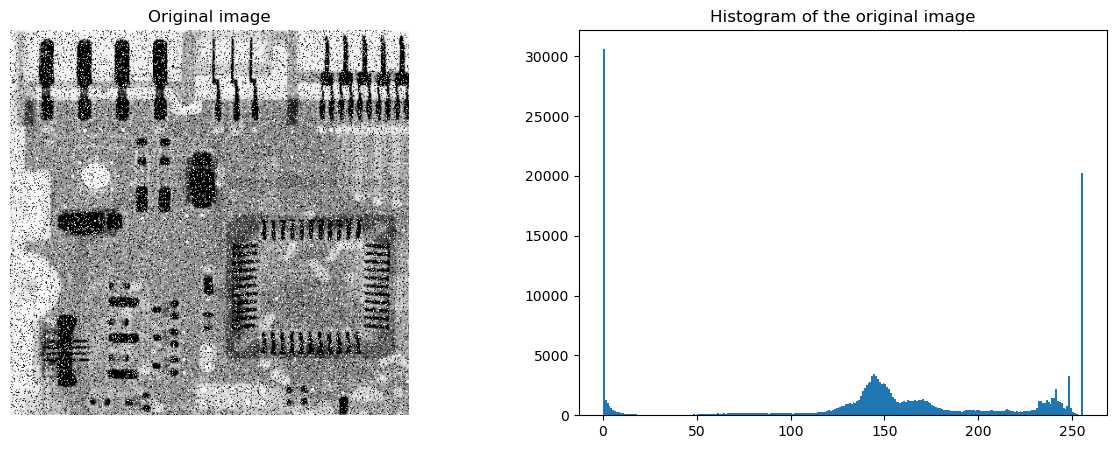

The histogram shows wide spread of intensities,and peaks in low and high intensities which indicates high noise.


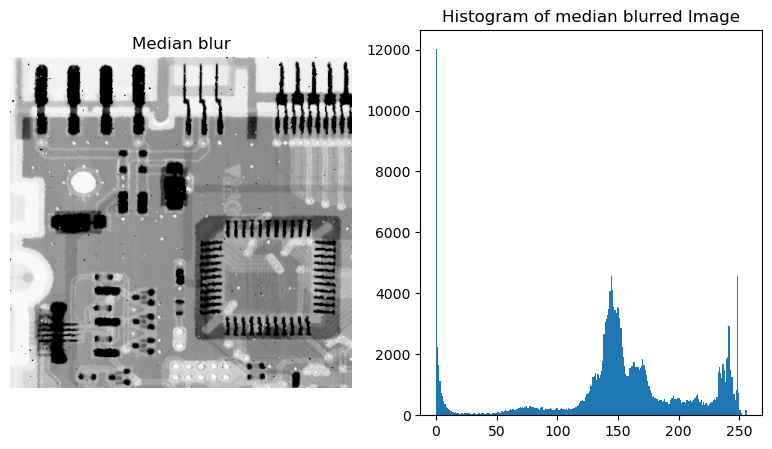

The histogram now have less extreme peaks at the ends and is more concentrated in the middle(grey) area.


In [305]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read image
image = cv.imread('pcb.tif', cv.IMREAD_GRAYSCALE)

# show original image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# show histogram of the original image
plt.subplot(1,2,2)
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.title('Histogram of the original image')
plt.show()
print("The histogram shows wide spread of intensities,and peaks in low and high intensities which indicates high noise.")

# median filter
median = cv.medianBlur(image , 3)

# show median blurred image
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(median, cmap='gray')
plt.title('Median blur')
plt.axis('off')

# show histogram of the median blurred image
plt.subplot(1,3,2)
plt.hist(median.ravel(), bins=256, range=[0,256])
plt.title('Histogram of median blurred Image')
plt.show()
print("The histogram now have less extreme peaks at the ends and is more concentrated in the middle(grey) area.")



# Problem 6

### Problem: Low contrast image
proof:
-numerical: Contrast = Lmax − Lmin

-statistical: Narrow histogram
m-visual: in
Low dynamic range: Dull, washed-out gray 

### Solutions:
1- inverse log (expo)
proofs:
-the image is dark and the inverse log will brighten it.
-normalise and distribute intensity values.

2- histogram equalisation
proofs:
-concentrated intensities(only 7 peaks)
-descrete and low intensity resolution (spaces between peaks).)ook

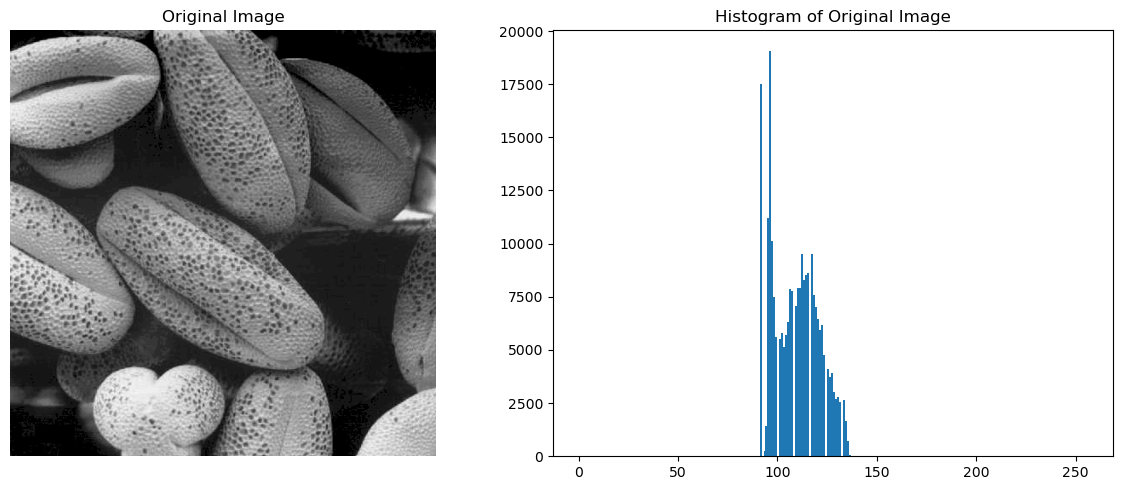

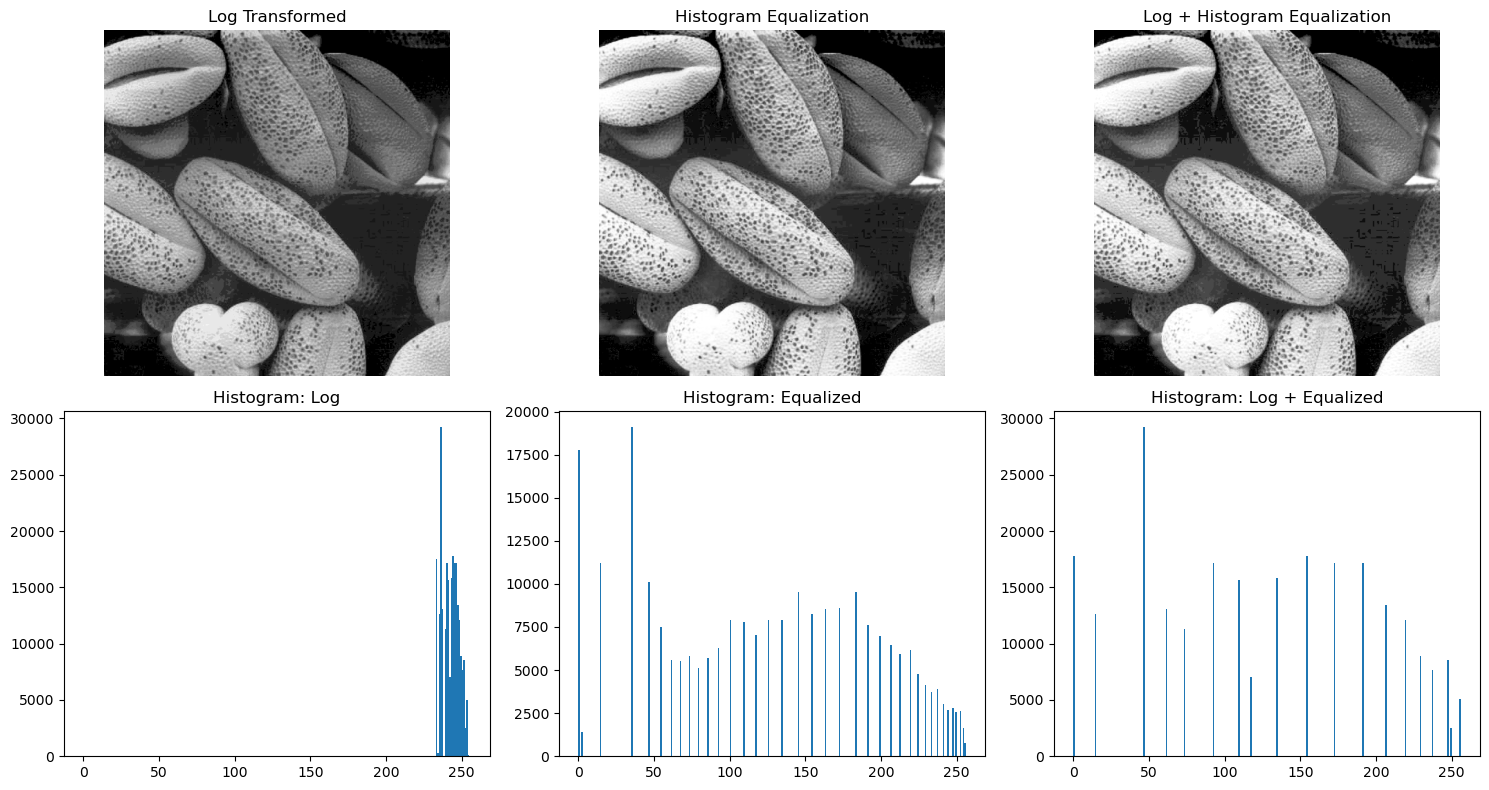

In [374]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read image in grayscale
image = cv.imread('pollen.tif', cv.IMREAD_GRAYSCALE)

# show original image
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# show histogram
plt.subplot(1,2,2)
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.title('Histogram of the original image')
plt.tight_layout()
plt.show()

# log transformation
c = 255 / np.log(1 + np.max(image))
logImage = c * np.log1p(image.astype(np.float32))
logImage = np.uint8(logImage)

# histogram equalization
equalized = cv.equalizeHist(image)
logEqualized = cv.equalizeHist(logImage)

# display solutions
plt.figure(figsize=(15,8))

# Solution 1: Log transformation
plt.subplot(2,3,1)
plt.imshow(logImage, cmap='gray')
plt.title('Log Transformed')
plt.axis('off')
plt.subplot(2,3,4)
plt.hist(logImage.ravel(), bins=256, range=[0,256])
plt.title('Histogram: Log')

# Solution 2: histogram equalization
plt.subplot(2,3,2)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.subplot(2,3,5)
plt.hist(equalized.ravel(), bins=256, range=[0,256])
plt.title('Histogram: Equalized')

# combine solutions
plt.subplot(2,3,3)
plt.imshow(logEqualized, cmap='gray')
plt.title('Log + Histogram Equalization')
plt.axis('off')
plt.subplot(2,3,6)
plt.hist(logEqualized.ravel(), bins=256, range=[0,256])
plt.title('Histogram: Log + Equalized')

plt.tight_layout()
plt.show()
